<a href="https://colab.research.google.com/github/G-Srinandan/AIML_Projects_and_Labs/blob/main/DATA-VISUALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt

In [3]:
#datset loading...
data = StringIO(response.text)
data = pd.read_csv(data)
print("Number of data points =", len(data))
data.head()

Number of data points = 205


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
data.replace("?", np.nan, inplace = True)
data = data.dropna()
print(len(data))

159


In [5]:
# Dividing the dataset into features (X) and the target variable (y)

X = data.drop("price", axis = 1)
y = pd.to_numeric(data["price"])

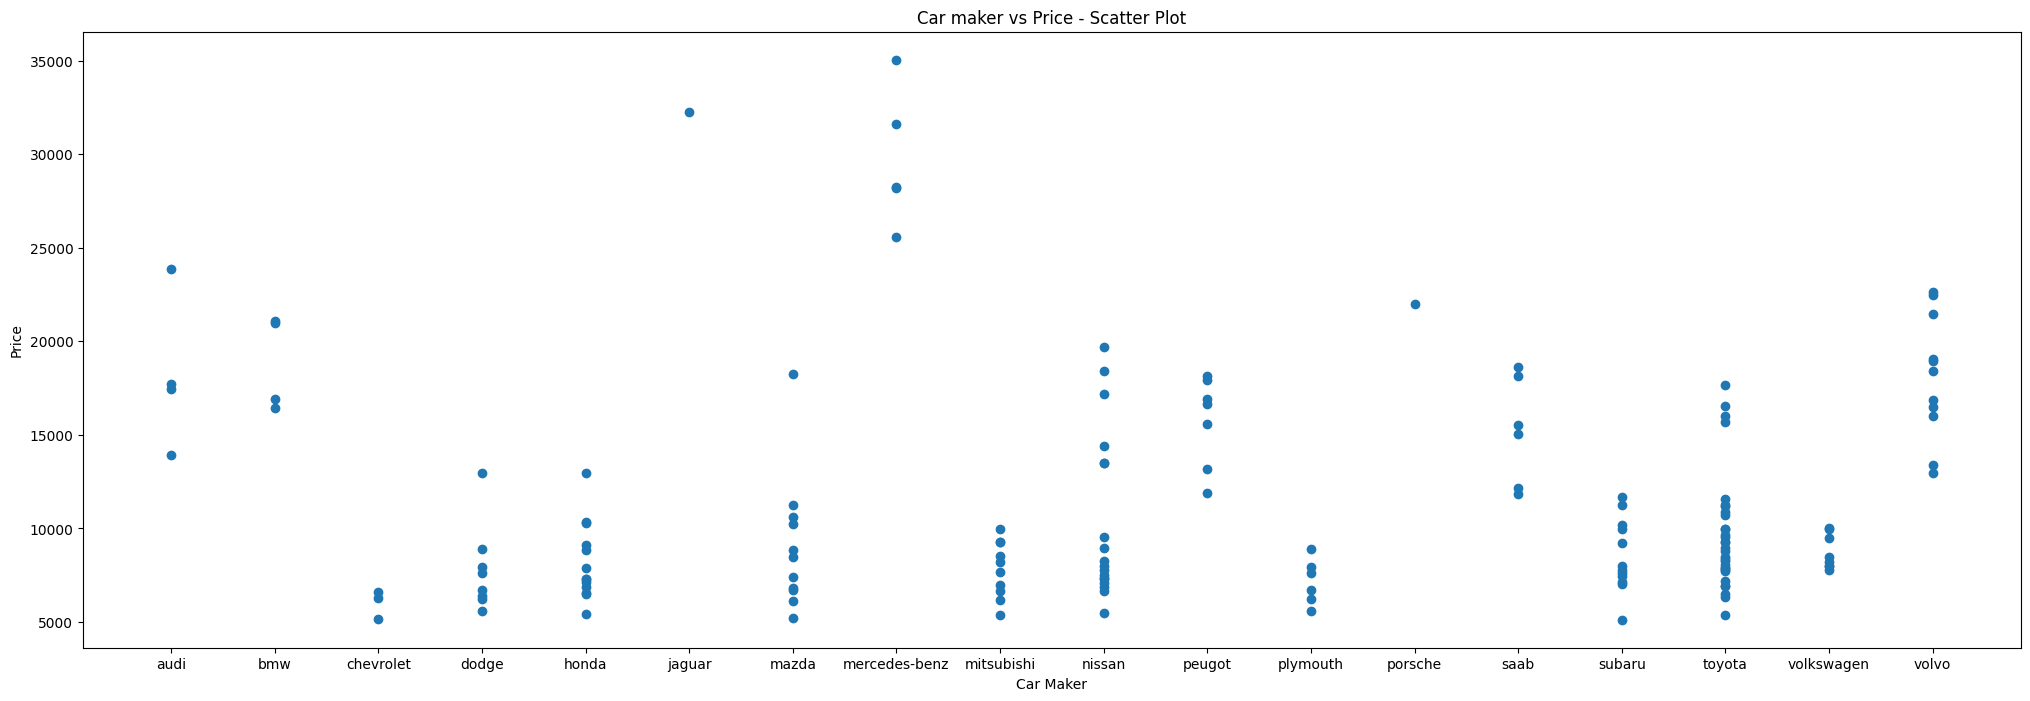

In [6]:
#Car maker vs Price scteer plot
plt.figure(figsize =(25,8))
plt.scatter(X["make"], y)
plt.xlabel('Car Maker')
plt.ylabel('Price')
plt.title('Car maker vs Price - Scatter Plot')
plt.show()

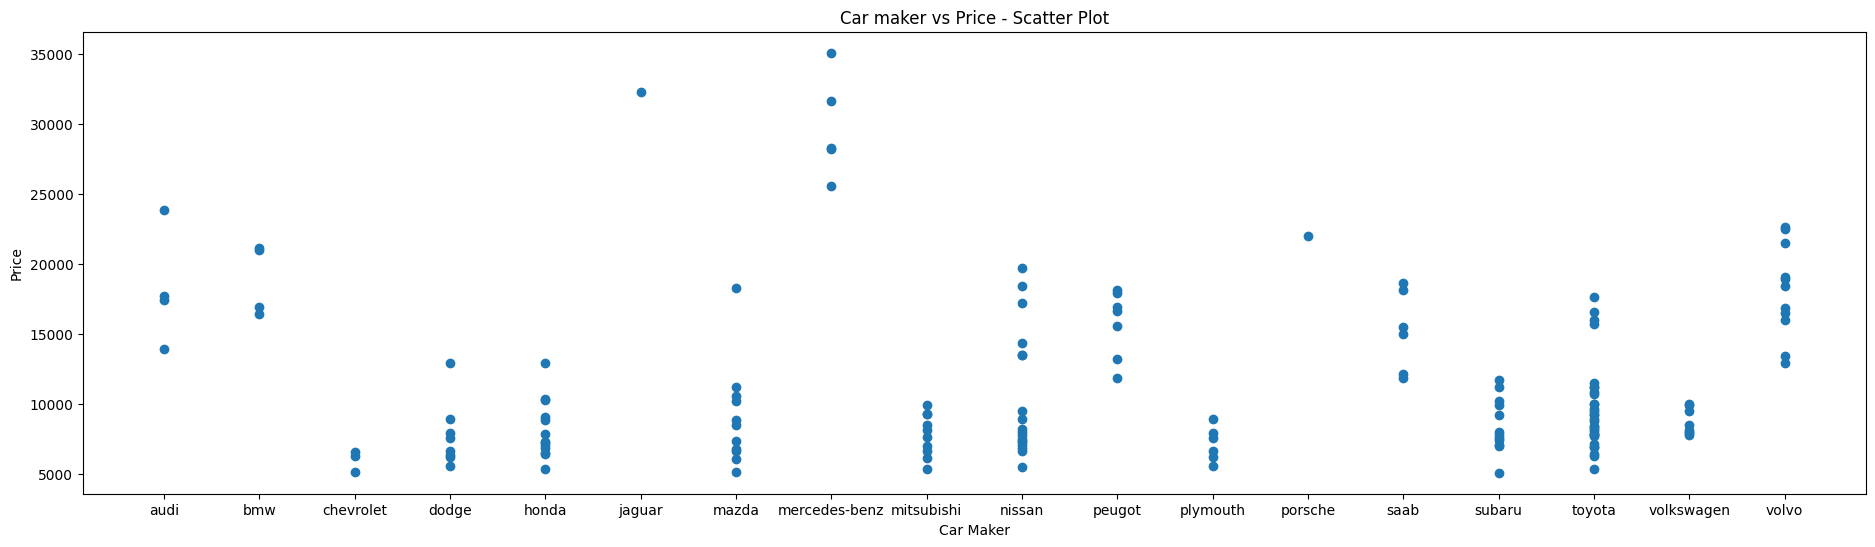

In [7]:
#Car maker vs Price scteer plot
plt.figure(figsize =(23,6))
plt.scatter(X["make"], y)
plt.xlabel('Car Maker')
plt.ylabel('Price')
plt.title('Car maker vs Price - Scatter Plot')
plt.show()

In [8]:
 data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


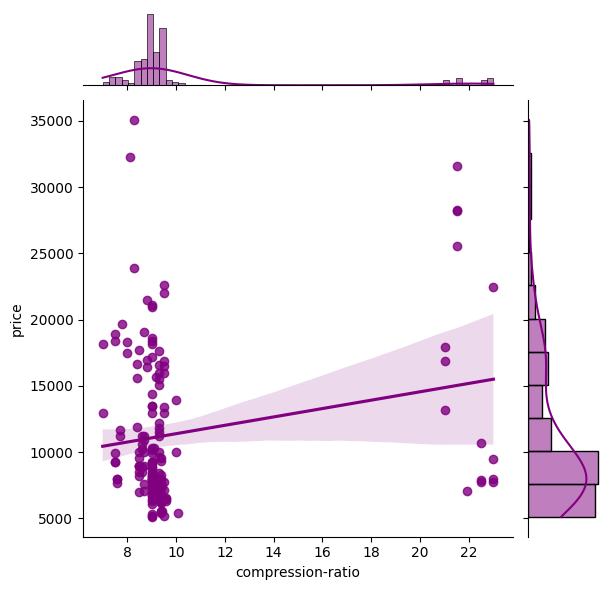

In [9]:
#Given to plot the jointplot for a feature which has negative correlation with the target variable "price"
#From the data, I can't accurately say that there is a negative correlation between compression ratio and price, but by observing a few rows, I have decided to investigate whether there is a negative correlation between the two.
feature = "compression-ratio"
sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'purple')

In [10]:
#Actually it's not..
print(data["engine-size"])

3      109
4      136
6      136
8      131
10     108
      ... 
200    141
201    141
202    173
203    145
204    141
Name: engine-size, Length: 159, dtype: int64


<Axes: xlabel='engine-size', ylabel='price'>

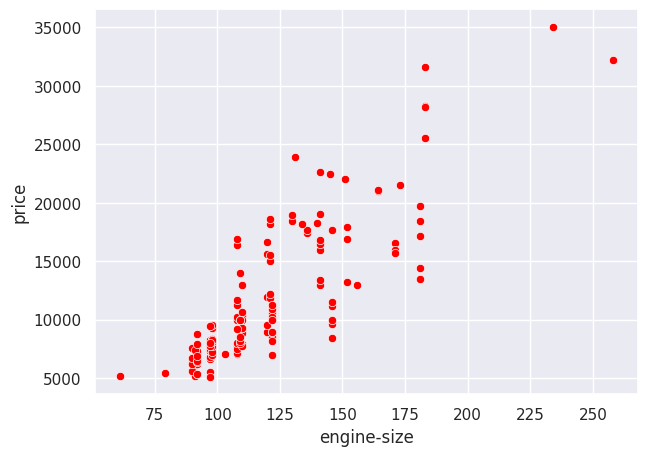

In [11]:
sns.set(rc={'figure.figsize':(7,5)})
sns.scatterplot(x=pd.to_numeric(X["engine-size"]), y = y, color = "red")

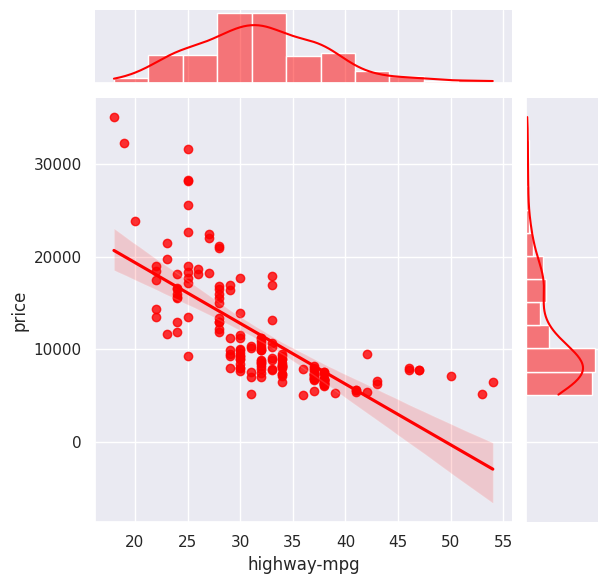

In [12]:
# I think there is only one feature that is negatively correlated to price ->>> highway-mpg
feature = "highway-mpg"
sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'red')

In [13]:
#exercise : Plotting multiple plots together: Search for information about plt.subplots(). Choose any 2 plot types from the ones discussed above and plot them together in a single figure using subplots.

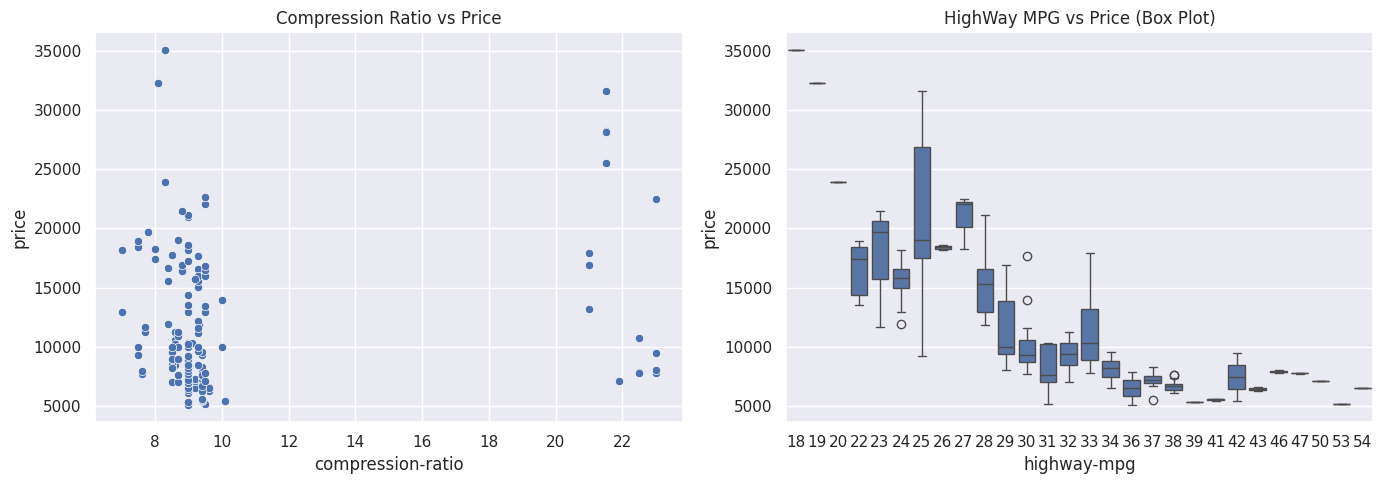

In [15]:
# Convert needed columns to numeric
data["price"] = pd.to_numeric(data["price"])
data["compression-ratio"] = pd.to_numeric(data["compression-ratio"])
data["engine-size"] = pd.to_numeric(data["engine-size"])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
sns.scatterplot(x="compression-ratio", y="price", data=data, ax=axes[0])
axes[0].set_title("Compression Ratio vs Price")

# Box plot
sns.boxplot(x="highway-mpg", y="price", data=data, ax=axes[1])
axes[1].set_title("HighWay MPG vs Price (Box Plot)")

plt.tight_layout()
plt.show()


In [16]:
#next

In [17]:
#Line plot

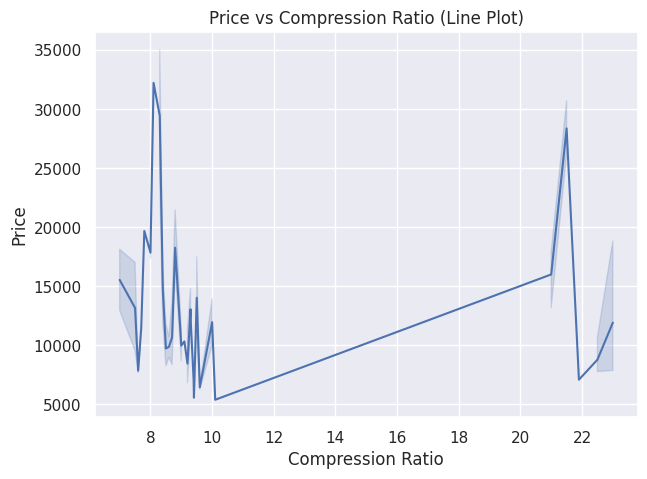

In [18]:
#Price vs Compression Ratio (Line Plot)
#We'll sort the data first to make the line smoother
# Sort for line plot
line_data = data.sort_values(by="compression-ratio")

# Line plot
sns.lineplot(x="compression-ratio", y="price", data=line_data)
plt.title("Price vs Compression Ratio (Line Plot)")
plt.xlabel("Compression Ratio")
plt.ylabel("Price")
plt.grid(True)
plt.show()


In [19]:
#next heatmap

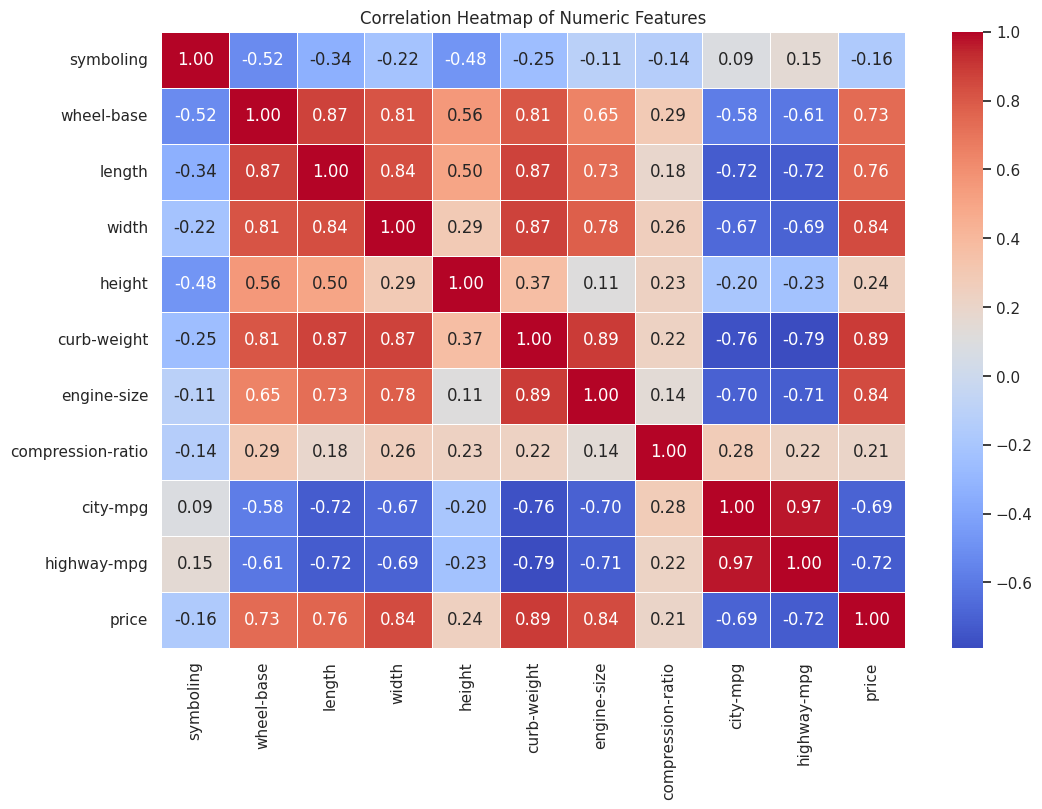

In [20]:
# Select only numeric features
numeric_data = data.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


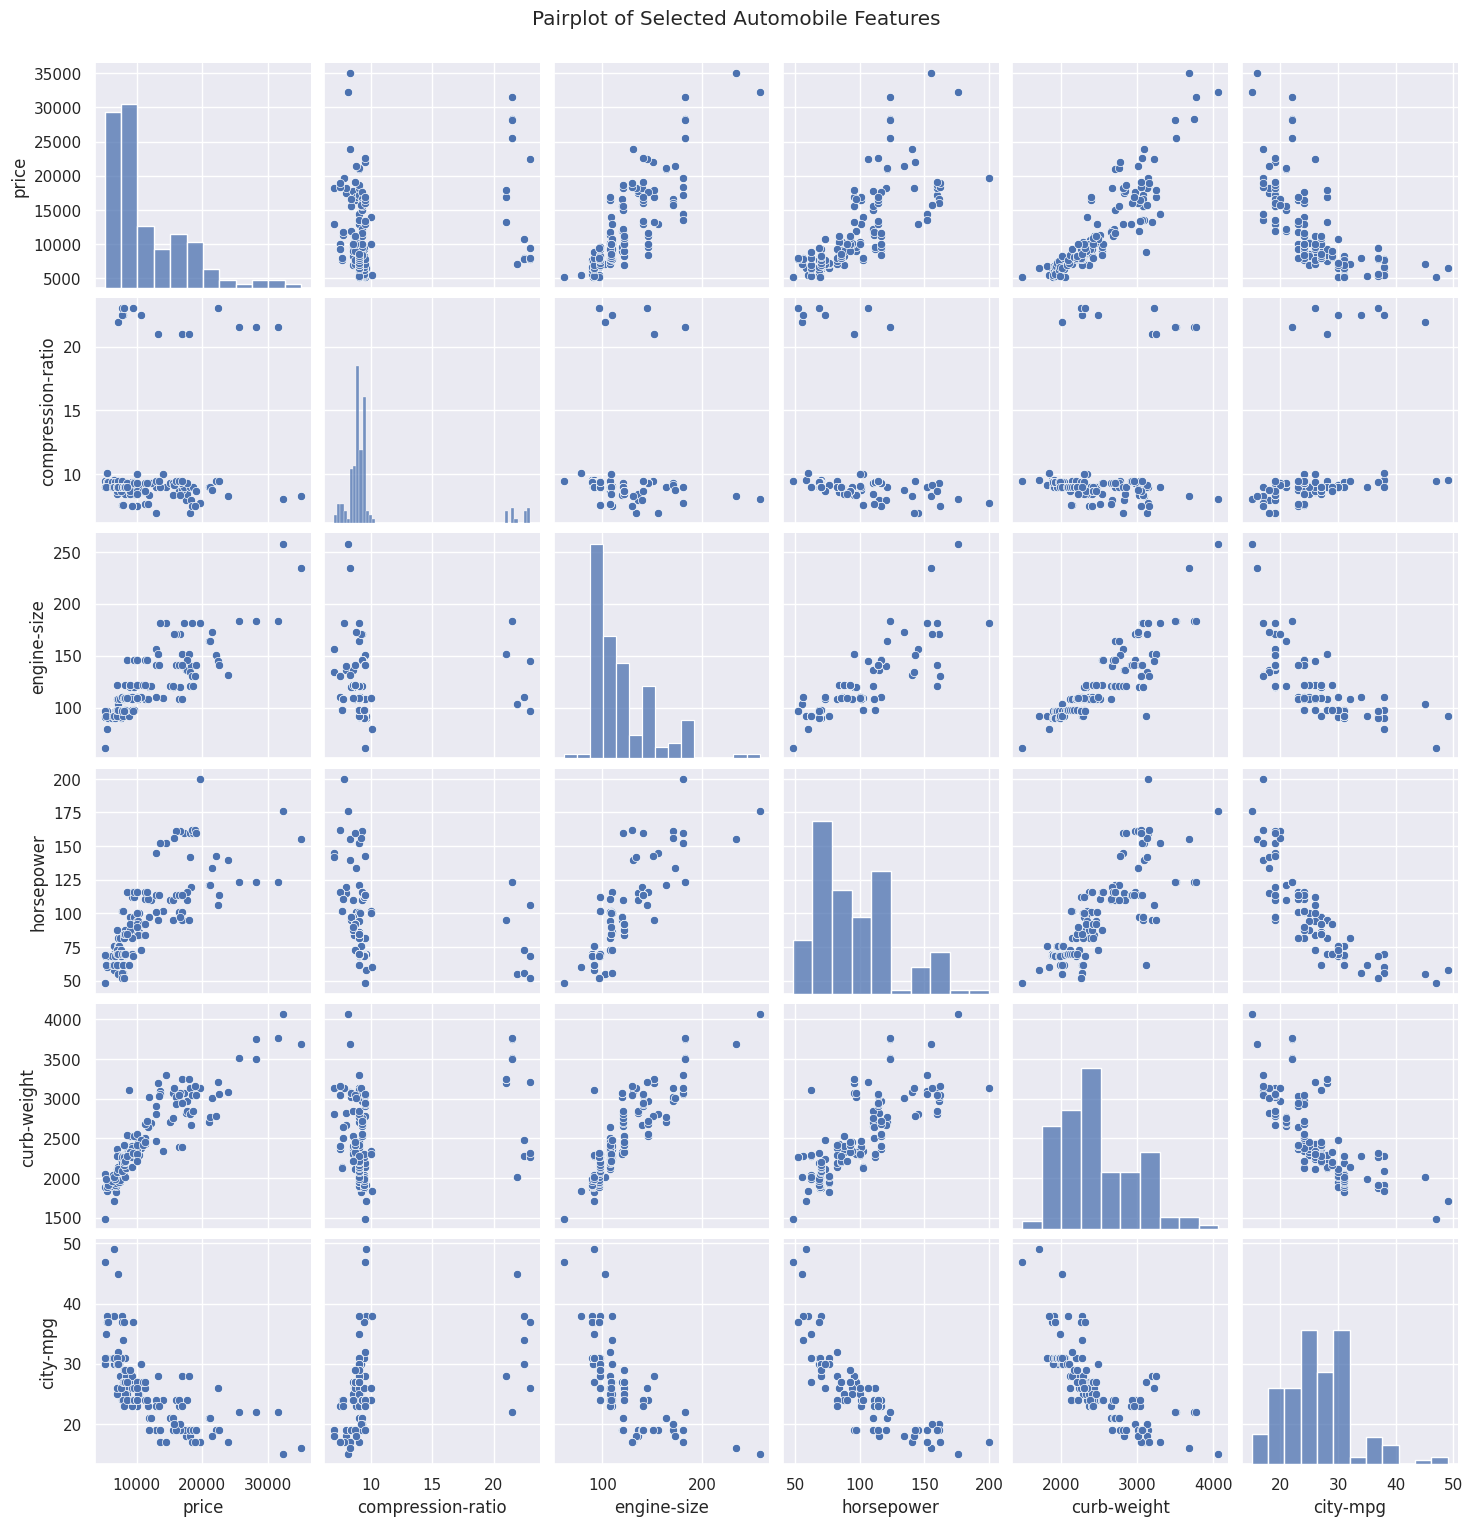

In [21]:
#pairplot

# Convert relevant numeric columns to float
numeric_columns = [
    'price', 'compression-ratio', 'engine-size',
    'horsepower', 'curb-weight', 'city-mpg'
]

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col])

# Subset of data for pairplot
subset = data[numeric_columns]

# Plot the pairplot
sns.pairplot(subset)
plt.suptitle("Pairplot of Selected Automobile Features", y=1.02)
plt.show()